In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
companyValues = pd.read_csv('data/CompanyValues.csv')

In [4]:
companyValues['change'] = 100 * ((companyValues['close_value'] - companyValues['open_value']) / companyValues['open_value'])

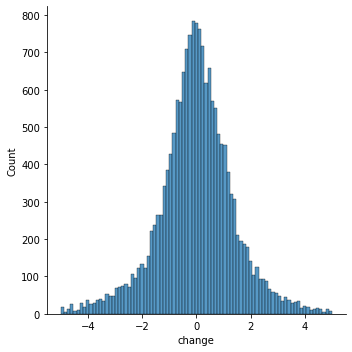

In [5]:
sns.displot(companyValues['change'], binrange = ([-5, 5]))

In [6]:
# labeling
# binary
for i in range(len(companyValues)):
  if companyValues.loc[i, 'change'] < 0:
    companyValues.loc[i, 'label'] = 0 
  else:
    companyValues.loc[i, 'label'] = 1


In [7]:
# splitting data by companies

apple = companyValues[companyValues['ticker_symbol'] == 'AAPL']
apple.to_csv("data/APPLdata.csv", index = False)
googl = companyValues[companyValues['ticker_symbol'] == 'GOOGL']
googl.to_csv("data/GOOGLdata.csv", index = False)
goog = companyValues[companyValues['ticker_symbol'] == 'GOOG']
goog.to_csv("data/GOOGdata.csv", index = False)
tesla = companyValues[companyValues['ticker_symbol'] == 'TSLA']
tesla.to_csv("data/TSLAdata.csv", index = False)
microsoft = companyValues[companyValues['ticker_symbol'] == 'MSFT']
microsoft.to_csv("data/MSFTdata.csv", index = False)

In [8]:
# checking the size of each company data

apple_size = apple.shape[0]
googl_size = googl.shape[0]
goog_size = goog.shape[0]
tesla_size = tesla.shape[0]
microsoft_size = microsoft.shape[0]

## Every company has around 3000 data points 

In [9]:
# companies = ['APPL', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']

# width  = 0.9   # width of real body
# width2 = 0.05
# for c in companies:
#        df = pd.read_csv(f'data/{c}data.csv')
#        for i in range(30, len(df)):
#               fig, ax = plt.subplots(figsize=(2, 2), dpi=50)
#               fig.patch.set_facecolor('black')
#               plt.axis('off')
              
#               # find the rows that are bullish
#               dfSlice = df[i-30:i]
#               dfup = dfSlice[dfSlice["close_value"] >= dfSlice["open_value"]]
              
#               # find the rows that are bearish
#               dfdown = dfSlice[dfSlice["close_value"] < dfSlice["open_value"]]
              
#               # plot the bullish candle stick
#               ax.bar(dfup.index, dfup.close_value - dfup.open_value, width, 
#                      bottom = dfup.open_value, edgecolor='g', color='green')
#               ax.bar(dfup.index, dfup.high_value - dfup.close_value, width2, 
#                      bottom = dfup.close_value, edgecolor='g', color='green')
#               ax.bar(dfup.index, dfup.low_value - dfup.open_value, width2, 
#                      bottom = dfup.open_value, edgecolor='g', color='green')
              
#               # plot the bearish candle stick
#               ax.bar(dfdown.index, dfdown.close_value - dfdown.open_value, width, 
#                      bottom = dfdown.open_value, edgecolor='r', color='red')
#               ax.bar(dfdown.index, dfdown.high_value - dfdown.open_value, width2, 
#                      bottom = dfdown.open_value, edgecolor='r', color='red')
#               ax.bar(dfdown.index, dfdown.low_value - dfdown.close_value, width2, 
#                      bottom = dfdown.close_value, edgecolor='r', color='red')
#               ax.grid(color='gray')

#               fig.savefig(f'data/images/{c}_{i}_{int(df.loc[i, "label"])}.png')
#               plt.close()

In [10]:
companies = ['APPL', 'GOOG', 'GOOGL', 'MSFT', 'TSLA']
imageNames = pd.DataFrame(columns=['fileName', 'label'])

for c in companies:
       df = pd.read_csv(f'data/{c}data.csv')
       for i in range(30, len(df)):
            imageNames.loc[len(imageNames)] = [f'{c}_{i}_{int(df.loc[i, "label"])}', int(df.loc[i, "label"])]

In [12]:
for companyName in companies:
    df = imageNames[imageNames['fileName'].str.contains(f'{companyName}')]
    df.to_csv(f'data/{companyName}.csv', index=False)